In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# NLP

El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje. Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.

<div>
<img src="NLP.jpg", width="450"/>
</div>

Dentro de los casos e uso de NLP se encuentran:
* Sentiment Analysis
* Named Entity Recognition (NER)
* Automatic Text Summarization
* Automated Question Answering 
* Content categorization
* Speech to Text and Text to Speech

Mas especificamente podemos ver:
* Las aplicaciones de traducción como Google Translate utilizan NLP para la traducción.
* NLP ayuda en la detección de noticias falsas. Por ejemplo, el grupo NLP del MIT ha desarrollado un sistema que identifica si una fuente está políticamente sesgada o no. Basándose en la precisión sugiere si confiar o no en una fuente de noticias.
* NLP ayuda en la clasificación de correos electrónicos. Empresas como Google y Yahoo analizan el texto de nuestros correos electrónicos para filtrar y detener los spams.
* NLP puede ayudar a reconocer y predecir la condición médica o enfermedad del paciente sobre la base de su propio habla y algunos otros registros. Por ejemplo, Amazon utiliza un servicio llamado Amazon Comprehend Medical. Utiliza NLP para entender el estado de la enfermedad del paciente, medicamentos y resultados del tratamiento de las notas de voz del paciente, informes de ensayos clínicos, etc.
* Los Traders utilizan NLP para rastrear noticias, informes y comentarios. Todas las perspectivas obtenidas se alimentan en un algoritmo de trading para generar los máximos beneficios.
* Varias aplicaciones de procesamiento de textos como Microsoft Word, Grammarly, etc. utilizan NLP para comprobar los errores gramaticales en el texto.
* Las organizaciones utilizan NLP para realizar análisis de opiniones sobre los datos de clientes recopilados de las redes sociales y otros recursos. Esto les ayuda a obtener información sobre las opciones y opiniones de los clientes sobre sus productos.
* Siri, Cortana, Alexa y otros asistentes de voz personales hacen uso de NLP para responder a nuestros comandos vocales. 
(Techvidvan, 2021)


# NLP en Python

Existen varias librerias especializadas en NLP en python, las mas utilizadas son Spacy y Nltk. Ambas poseen una variedad de herramientas para la limpieza, procesamiento y manejo. Hoy vamos a trabajar un pco con ambas.

<tr>
<td> <img src="SPACY.jpg" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="NLTK.png" alt="Drawing" style="width: 250px;"/> </td>
</tr>

# El problema

Para introducir las herramientas básicas de NLP y darles un punto de partida vamos a trabajar con un problema clasico: Analisis de sentimiento en twitter. Para esto, contamos con el dataset <a href="https://www.kaggle.com/kazanova/sentiment140">*Sentiment140*</a> el cual contiene 1.6M de tweet con su respectiva polaridad: 0 indicando un sentimiento negativo y 4 indicando un sentimiento positivo.

Debido al tamaño de la base, vamos a trabajar con una muestra de 10000 tweets unicamente.

Revisemos la base.

In [2]:
PATH = 'C:/Users/nicom/Documents/Anaytics Club Uniandes/Data/'

In [16]:
def load_data(path):
    df = pd.read_csv(path+'nlp_sample.csv', encoding='latin-1')
    #df.columns = ['sentiment', 'id', 'date', 'query', 'user_name', 'text']
    #df = df[['sentiment', 'text']]
    df['sentiment'] = np.where(df['sentiment'] == 4, 1, df['sentiment'])
    return df

In [17]:
df = load_data(PATH)
df.head()

,sentiment,text
0,0,Kaos pad shitting bed (as Ash says)... new one...
1,0,mmm No logro instalar el twhirl
2,0,@RebeccaHappy I have a lot of Earth Day &amp; ...
3,0,khanhtoan: Socbay was hacked by Vietnamese hac...
4,1,I love that people don't know your on twitter ...


In [5]:
df = df.sample(frac = 0.00625)

Hagamos unas graficas para explorar los datos:

El número de tweets negativos es: 5044
El número de tweets positivos es: 4956


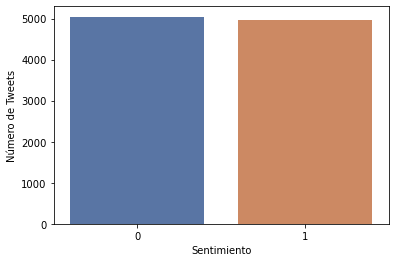

In [18]:
x_neg = df[df['sentiment']==0].shape[0]
x_pos = df[df['sentiment']==1].shape[0]
print('El número de tweets negativos es:',x_neg)
print('El número de tweets positivos es:',x_pos)
sns.set_palette("deep")
sns.countplot(x = 'sentiment', data = df)
plt.ylabel('Número de Tweets')
plt.xlabel('Sentimiento');

In [19]:
from wordcloud import WordCloud, STOPWORDS

#### Tweets Positivos

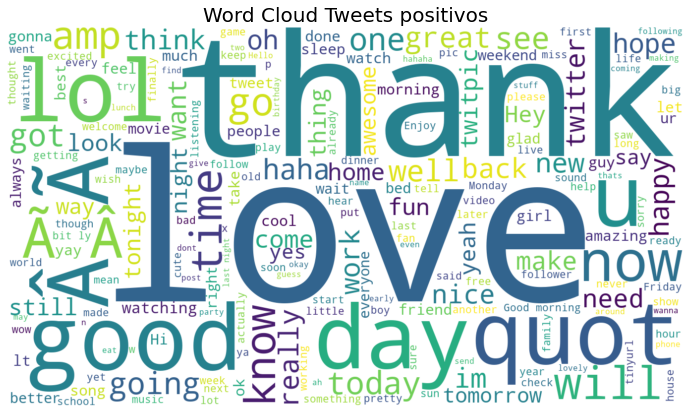

In [20]:
plt.figure(figsize=(14,7))
positive_text = ' '.join(df[df['sentiment'] == 1].text)
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Tweets positivos',fontsize=20)
plt.show()

#### Tweets Negativos

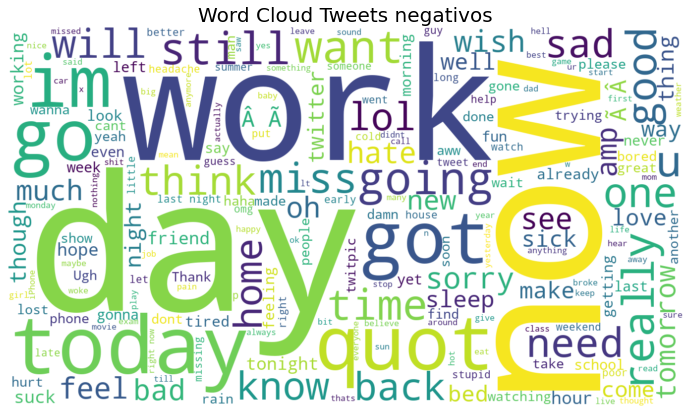

In [21]:
plt.figure(figsize=(14,7))
negative_text = ' '.join(df[df['sentiment'] == 0].text)
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Tweets negativos',fontsize=20)
plt.show()

## Expresiones Regulares

Dentro de un texto como lo es un tweet, nos encontramos con varios elementos que no nos aportan nada para determinar su sentimiento, como: las menciones, las URL o los hashtags. En este sentido, lo mas logico seria eliminarlos, pero cómo hacemos esto si cada uno de estos elementos puede tener infinidad de formas? Para este problema, las expresiones regulares llegan al rescate.

* Las expresiones regulares son patrones que se utilizan para hacer coincidir combinaciones de caracteres en cadenas. <a href="https://docs.python.org/3/library/re.html">(Librería Re Python)</a>

En nuestro caso, no sabemos como lucen los usuarios o los hashtags, pero sabemos que todos comparten un formato particular (usuarios empiezan con un @ o hastags con un #) con esto podemos construir una expresión regular que encuentre todo texto que siga dicho patrón y lo elimine de nuestro texto. 

Veamos un poco como:

In [22]:
import re

In [23]:
def clean_tweet(text):
    text = re.sub('@\S+','',text)
    text = re.sub('http?\S+', '', text)
    text = re.sub('www.\S+', '', text)
    text = re.sub('#\S+', '', text)
    return text

* \S hace match con cualquier caracter que no sea un espacio.
* '+' hace match con una o mas repeticiones del patrón especificado.

En este sentido:
* La primera expresión hace match con cualquier cosa que este precedida de un @ (Elimina menciones)
* La segunda y tercer expresión hacen match con cualquier cosa que este precedida de un http o www. (Elimina links y URLs)
* La cuarta expresión hace match con cualquier cosa que este precedida de un # (Elimina hashtags)

In [24]:
test = '@nicolas va a dar un taller de nlp, se pueden unir en el link https://zoom.us/54648679 o www.AC.com #AnalyticsClub'
clean_tweet(test)

' va a dar un taller de nlp, se pueden unir en el link  o  '

## Limpieza de Texto

Ademas de realizar una limpieza debido a la naturaleza de nuestro texto (tweets), antes de trabajar con cualquier tipo de texto se debe hacer un procesamiento del mismo debido al simple hecho de ser texto. Normalmente se siguen unos pasos "estandar".

* Dentro de cualquier idioma existen palabras que se repiten demasiado y no aportan ningun tipo de información, estas palabras se conocen como **stopwords**. En español estas serian palabras como: a, en, el, la, entre otras.
* Numeros, simbolos y signos de puntuacion no nos aportan información relevante (en este caso), deberíamos eliminarlos.
* Palabras como jugar, juega, jugó todas indican la misma accion y tienen el mismo proposito. En este sentido, deberiamos asegurarnos de que las tratemos como iguales, para hacerlo aplicamos procedimientos conocidos como **stemming** y **lemmatization**. El objetivo de estas tecnicas es reducir las palabras a su forma base o a su raíz.
* Dentro del texto puede existir la misma palabra escrita con mayúscula y con minúscula, es recomendable transformar todo a minúscula como base antes de trabajar.
* Es posible que nuestro texto tenga emojis, tambien deberiamos tratarlos.

Creemos una funcion que nos ayude a preprocesar el texto, aplicando todas estas reglas que definimos:

In [25]:
import string
import emoji
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm
import unidecode
import unicodedata

In [26]:
# Puntucacion
punctuations = string.punctuation
# Carga los modelos de spacy y las stopwords
parser = en_core_web_sm.load()
stop_words = STOP_WORDS 

In [27]:
def clean_text(text):
    # Limpia el Tweet
    text = clean_tweet(text)
    # Elimina espacios, emojis, números y convierte todo a minúscula.
    text = text.replace('\n','').replace('\r','').replace('\t','').strip().lower()
    text = re.sub(r'\d+', '', text)
    allchars = [str for str in text] 
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    text=''.join((c for c in unicodedata.normalize('NFD',text) if unicodedata.category(c) != 'Mn'))
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    # Tokenize
    token = parser(text)
    # Lemmatize
    token = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in token]
    # Quita stopwords y signos de puntuación
    token = ' '.join([word for word in token if word not in stop_words and word not in punctuations])
    token = unidecode.unidecode(token)
    token = ' '.join([w for w in token.split() if len(w)>1])
    return token

Probemos la función:

In [28]:
text = df['text'].iloc[np.random.randint(0,df.shape[0])]
print('Texto Original:', text)
print('Texto Limpio:', clean_text(text) )

Texto Original: done her final maths gcse today, was really easy? was it easy coz im smart or easy coz im thick?? a tad worried now  xxx
Texto Limpio: final math gcse today easy easy coz smart easy coz thick tad worried xxx


Ya con nuestro texto limpio podemos empezar a trabajar

In [29]:
df['text_clean'] = df['text'].apply(clean_text)

In [30]:
X = df['text_clean'].values
Y = df.sentiment

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

## Vectorización del Texto

Sabemos que los modelos de ML solo trabajan con números entonces, que hacemos con texto? 

Para poder trabajar con texto debemos hacerle una transformación, de letras a números, para que el computador y el modelo puedan entenderlo y trabajar con él. 

Cómo hacemos esto?

Hay muchas maneras de vectorizar el texto, en el taller veremos las tres mas populares:
* Bag of Words
* TF-IDF
* Word Embeddings

## Bag of Words

Un procedimiento de extracción de características muy común para oraciones y documentos es el enfoque de bolsa de palabras (BOW). En este enfoque, observamos el histograma de las palabras dentro del texto, es decir, consideramos que cada palabra es una variable diferente. (Página 69, Métodos de redes neuronales en el procesamiento del lenguaje natural, 2017.)

Es un método para convertir texto en vectores dispersos. Solo tiene en cuenta si las palabras están (o no) presentes en una oración determinada. Es muy simple, pero también la forma más ingenua de vectorización de texto.

**Ejemplo**: Consideremos dos oraciones
* Hello, how are you? (**S1**)
* Hello, how is it going? (**S2**)

Acá los vectores generados por *Bag of words* son

 | | Hello | how   | are   | you   | is | it | going |
|:---:|:-------------:|:-----------:|:------:|:------:|:-----------:|:------:|:------:|
| S1 | 1  | 1       | 1   | 1    | 0 | 0| 0|
| S2 | 1 | 1    | 0   | 0    | 1 | 1| 1|

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(min_df = 5)

x_train_vect = bow_vectorizer.fit_transform(x_train).toarray()
x_test_vect = bow_vectorizer.transform(x_test).toarray()

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 5, n_iter = 500, n_jobs = -1)

In [34]:
Grid_RF.fit(x_train_vect,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.9, 'RF__min_samples_leaf': 0.5, 'RF__max_features': 'sqrt', 'RF__max_depth': 3.0}
Mejor AUC en Train: 0.503


In [35]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
y_pred = Grid_RF.best_estimator_.predict(x_test_vect)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test_vect)[:,1]
print('La precisión del modelo BOW calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo BOW calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo BOW calibrado es: 0.52
El AUC del modelo BOW calibrado es: 0.50


## TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF es una ponderación que se utiliza a menudo en la recuperación de información y la minería de texto. Este peso es una medida estadística que se utiliza para evaluar la importancia de una palabra para un documento en una colección o corpus. La importancia aumenta proporcionalmente al número de veces que aparece una palabra en el documento, pero se compensa con la frecuencia de la palabra en el corpus. (tfidf.com)

TF-IDF se presenta como una mejora a BOW en el sentido que tiene en cuenta no solo si una palabra en particular está presente en una oración, sino que también pondera cada palabra de acuerdo con su frecuencia e importancia general.

El coeficiente TF-IDF se compone de dos partes:

$$TF(t) = \frac{Número \textrm{ } de \textrm{ } veces \textrm{ } que \textrm{ } aparece \textrm{ } el  \textrm{ } término \textrm{ } t \textrm{ } en \textrm{ } un \textrm{ } documento} {Número \textrm{ } total \textrm{ } de \textrm{ } términos \textrm{ } en \textrm{ } el \textrm{ } documento}$$


 $$IDF(t) = log \left(\frac{Número\textrm{ } total\textrm{ } de\textrm{ } documentos}{Número\textrm{ } de\textrm{ } documentos\textrm{ } con\textrm{ } el\textrm{ } término\textrm{ } t}\right)$$
 
 
 $$ \rm{TF-IDF(t)} = TF(t) * IDF(t) $$
 
**Ejemplo**:

Consideremos un documento que contiene 100 palabras, en el que la palabra gato aparece 3 veces. El TF para gato es entonces:

$$TF_{gato} = \frac{3}{100} = 0.03$$

Ahora, suponga que tenemos 10 millones de documentos y la palabra gato aparece en mil de ellos. Entonces, el IDF se calcula como: 

$$IDF_{gato} = log\left(\frac{10000000}{1000}\right) = 4$$

De esta manera, el peso TF-IDF es el producto de estas dos cantidades: 

$$\rm{TF-IDF}_{gato} = TF_{gato} * IDF_{gato} =  0.03 * 4 = 0.12$$


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 5)

x_train_vect = tfidf_vectorizer.fit_transform(x_train).toarray()
x_test_vect = tfidf_vectorizer.transform(x_test).toarray()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 5, n_iter = 500, n_jobs = -1)

In [38]:
Grid_RF.fit(x_train_vect,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.6, 'RF__min_samples_leaf': 0.2, 'RF__max_features': None, 'RF__max_depth': 17.0}
Mejor AUC en Train: 0.503


In [39]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
y_pred = Grid_RF.best_estimator_.predict(x_test_vect)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test_vect)[:,1]
print('La precisión del modelo TFIDF calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo TFIDF calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo TFIDF calibrado es: 0.52
El AUC del modelo TFIDF calibrado es: 0.50


## Word Embeddigs

*Word Embeddings* son el método más popular para representar texto. Son capaces de generar una representación que mantiene relaciones semánticas y sintácticas entre palabras.

<div>
<img src="WE.png", width="450"/>
</div>

En términos simples, son una representación vectorial de la palabra / texto que captura la esencia del lenguaje.

Los métodos más populares son:
* Word2Vec
* GloVe
* ElMo
* BERT

### Word2Vec

El modelo *Word2Vec* consiste en una red neuronal poco profunda que se utiliza para encontrar representaciones vectoriales de las palabras dentro de un texto. 

Existen ds formas de construir el modelo:
* En la primera, la red neuronal recibe como entrada un vector binario (*One Hot Encoded*) de la palabra e intenta predecir las palabras que la rodean (*Skip-gram*) 
* En la segunda, la red recibe varios vectores binarios de las palabras de contexto e intenta predecir un vector objetivo (*CBOW*)

<div>
<img src="WV_.png", width="500"/>
</div>


Las representaciones vectoriales de las palabras son el resultado de entrenar los pesos de la capa oculta de una red neuronal poco profunda.

<div>
<img src="WV2_.png", width="750"/>
</div>

Y estos vectores poseen unas propiedades muy interesantes: 

* Los *Word Embeddings* resultantes no solo transforman el texto en números, sino que también capturan el significado semántico de las palabras. 
* Si dos palabras diferentes son similares en contexto, la salida de la RN debería ser similar. Para que la salida sea similar, la fila correspondiente de la matriz de peso de la capa oculta debe ser similar.
* Las palabras que tienen un significado contextual similar aparecerán más cerca en el espacio vectorial.
* !Se pueden realizar operaciones entre los vectores y sus resultados tienen sentido!

<div>
<img src="WV3_.png", width="700"/>
</div>


Entrenemos nuestro propio modelo Word2Vec

In [40]:
sentences = [row.split() for row in df['text_clean']]

In [41]:
from gensim.models import Word2Vec
import multiprocessing
cores = multiprocessing.cpu_count()
we = Word2Vec(min_count = 20, window = 2, vector_size = 50, sample = 6e-5, alpha = 0.03, min_alpha = 0.0007, negative = 20, workers = cores-1)

In [42]:
we.build_vocab(sentences, progress_per = 10000)

In [43]:
we.train(sentences, total_examples = we.corpus_count, epochs = 30)

(195480, 1791420)

Ahora que nuestro modelo esta entrenado, hagamos una prueba:

In [44]:
we.wv.most_similar(["work"])

[('headache', 0.9986365437507629),
 ('mom', 0.9986173510551453),
 ('boring', 0.9986125826835632),
 ('end', 0.9986085295677185),
 ('school', 0.9985867738723755),
 ('head', 0.9985358715057373),
 ('mind', 0.9984806180000305),
 ('office', 0.9984567165374756),
 ('mother', 0.9984304904937744),
 ('bbq', 0.9983814358711243)]

Ya teniendo el modelo podemos crear vectores para representar cada tweet y usarlos para entrenar un modelo de clasificación como en los casos anteriores. Para eso creemos un par de funciones:

In [45]:
import nltk

In [46]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [47]:
def vectorize(text):
    tokens = tokenize_text(text)
    vec = np.zeros(50)
    for word in tokens:
        if word in we.wv:
            vec += we.wv[word]
    return vec

Con la funcion tokenize separamos el texto en palabras las cuales vectorizamos y sumamos para encontrar el vector del tweet. Utilizamos este vector como feature de nuestro modelo de detección de sentimiento.

**Nota**: A pesar de estar utilizando un modelo Word2Vec es posible que el clasificador nos de peor que en los casos anteriores, esto es debido a que no tenemos un corpus lo suficientemente grande para aprender las relaciones semanticas y sintacticas del lenguaje. En otras palabras al tener tan poco texto, los vectores no son my buenos.

In [48]:
df['vect'] = df['text_clean'].apply(vectorize)

In [49]:
X = np.vstack(df['vect'].values)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 5, n_iter = 500, n_jobs = -1)

In [51]:
Grid_RF.fit(x_train,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.2, 'RF__min_samples_leaf': 0.1, 'RF__max_features': None, 'RF__max_depth': 6.0}
Mejor AUC en Train: 0.554


In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
y_pred = Grid_RF.best_estimator_.predict(x_test)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test)[:,1]
print('La precisión del modelo Word2Vec calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Word2Vec calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo Word2Vec calibrado es: 0.57
El AUC del modelo Word2Vec calibrado es: 0.59


### Transfer Learning

> “If I have seen further than others, it is by standing upon the shoulders of giants.” - Isaac Newton

*Transfer Learning* es un método de aprendizaje automático en el que un modelo desarrollado para una tarea se reutiliza como punto de partida para un modelo en una segunda tarea.

Es un enfoque popular en el aprendizaje profundo donde los modelos pre-entrenados se utilizan como el punto de partida en la visión por computadora y las tareas de procesamiento del lenguaje natural dados los vastos recursos informáticos y de tiempo necesarios para desarrollar modelos de red neuronal sobre estos problemas y a partir de los enormes saltos en habilidad que proporcionan en los problemas relacionados.



In [54]:
import gensim.downloader as api
from gensim.models import KeyedVectors
# Si no tienes el modelo descargado se corre este comando
#we = api.load("word2vec-google-news-300")
# Una vez se ha descargado solo es leerlo
we = KeyedVectors.load('word2vec-google-news-300.kv', mmap = 'r')

In [55]:
def vectorize(text):
    tokens = tokenize_text(text)
    vec = np.zeros(300)
    for word in tokens:
        if word in we:
            vec += we[word]
    return vec

In [56]:
df['vect_tl'] = df['text_clean'].apply(vectorize)

In [57]:
X = np.vstack(df['vect_tl'].values)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': ['auto','log2','sqrt',None],
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'accuracy', cv = 5, n_iter = 500, n_jobs = -1)

In [59]:
Grid_RF.fit(x_train,y_train)
print('Mejores Parametros: %s' % Grid_RF.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_RF.best_score_)

Mejores Parametros: {'RF__min_samples_split': 0.1, 'RF__min_samples_leaf': 0.1, 'RF__max_features': 'auto', 'RF__max_depth': 10.0}
Mejor AUC en Train: 0.669


In [60]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
y_pred = Grid_RF.best_estimator_.predict(x_test)
y_pred_proba = Grid_RF.best_estimator_.predict_proba(x_test)[:,1]
print('La precisión del modelo Word2Vec TL calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo Word2Vec TL calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo Word2Vec TL calibrado es: 0.67
El AUC del modelo Word2Vec TL calibrado es: 0.74


### Deep Learning con los vectores pre-entrenados

#### Qué es una Red Neuronal

Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas.

Las unidades de procesamiento se organizan en capas. Hay tres partes normalmente en una red neuronal : una capa de entrada, con unidades que representan los campos de entrada; una o varias capas ocultas; y una capa de salida, con una unidad o unidades que representa el campo o los campos de destino. Las unidades se conectan con fuerzas de conexión variables (o ponderaciones). Los datos de entrada se presentan en la primera capa, y los valores se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

<div>
<img src="NN.jpg", width="500"/>
</div>

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

Al principio, todas las ponderaciones son aleatorias y las respuestas que resultan de la red son, posiblemente, disparatadas. La red aprende a través del entrenamiento. Continuamente se presentan a la red ejemplos para los que se conoce el resultado, y las respuestas que proporciona se comparan con los resultados conocidos. La información procedente de esta comparación se pasa hacia atrás a través de la red, cambiando las ponderaciones gradualmente. A medida que progresa el entrenamiento, la red se va haciendo cada vez más precisa en la replicación de resultados conocidos. Una vez entrenada, la red se puede aplicar a casos futuros en los que se desconoce el resultado. (IBM, 2021)

#### Redes Neuronales Recurrentes

Los humanos no empiezan a pensar desde cero cada segundo. Al leer estas palabras, comprendes cada palabra basándote en tu comprensión de las palabras anteriores. No tiras todo a la borda y empiezas a pensar desde cero otra vez. Tus pensamientos tienen persistencia.

Las redes neuronales tradicionales no pueden hacer esto, y parece una deficiencia importante. Por ejemplo, imagine que desea clasificar qué tipo de evento está sucediendo en cada punto de una película. No está claro cómo una red neuronal tradicional podría usar su razonamiento sobre eventos anteriores en la película para informar a los posteriores.

Las redes neuronales recurrentes abordan este problema. Son redes con bucles en ellos, lo que permite que la información persista. (Understanding LSTM Networks, 2015)

<div>
<img src="RNN-unrolled.png", width="400"/>
</div>

Esta naturaleza en cadena revela que las redes neuronales recurrentes están íntimamente relacionadas con secuencias y listas. Son la arquitectura natural de la red neuronal para usar para estos datos.

¡Y ciertamente se usan! En los últimos años, ha habido un éxito increíble aplicando RNNs a una variedad de problemas: reconocimiento de voz, modelado de idiomas, traducción, subtitulado de imágenes... La lista continúa

Esencial para estos éxitos es el uso de *LSTMs*, un tipo muy especial de red neuronal recurrente que funciona, para muchas tareas, mucho mejor que la versión estándar. Casi todos los resultados emocionantes basados en redes neuronales recurrentes se logran con ellos.

##### LSTM

Las LSTMs están diseñadas explícitamente para evitar el problema de dependencia a largo plazo. Recordar información durante largos períodos de tiempo es prácticamente su comportamiento predeterminado, no algo que les cuesta aprender!

Todas las redes neuronales recurrentes tienen la forma de una cadena de módulos repetidos de red neuronal. En los RNN estándar, este módulo de repetición tendrá una estructura muy simple, como una sola capa de tanh.

<div>
<img src="RNN.png", width="350"/>
</div>

Los LSTMs también tienen esta estructura similar a la cadena, pero el módulo repetidor tiene una estructura diferente. En lugar de tener una sola capa de red neuronal, hay cuatro, interactuando de una manera muy especial.

<div>
<img src="LSTM.png", width="350"/>
</div>

La clave de las LSTMs es el estado de celda, la línea horizontal que se ejecuta a través de la parte superior del diagrama.

El estado celular es como una cinta transportadora. Se ejecuta directamente por toda la cadena, con sólo algunas interacciones lineales menores. Es muy fácil para la información fluir a lo largo de ella sin cambios.

El LSTM tiene la capacidad de quitar o agregar información al estado de la célula, cuidadosamente regulado por estructuras llamadas puertas. Las puertas son una manera de dejar pasar la información opcionalmente. Se componen de una capa de red neuronal sigmoide y una operación de multiplicación puntual.

La capa sigmoide genera números entre cero y uno, describiendo cuánto de cada componente debe ser dejado pasar. Un valor de cero significa "no deje pasar nada", mientras que un valor de uno significa "¡deja pasar todo!". Un LSTM tiene tres de estas puertas, para proteger y controlar el estado celular.

**Nota**: Esto es solo un abrebocas de redes neuronales recurrentes, si quieren entender mas a fondo acerca de ellas y de las LSTM, pueden visitar el increible blog de donde salio esta información <a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/n">Colah's Blog</a>

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [63]:
X = df['text_clean'].values
Y = df['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [66]:
tokenizer = Tokenizer(oov_token = '<UNK>')
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 
max_length = 50
embedding_dim = 300

In [67]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i > vocab_size:
        continue
    if word in we:
        embedding_matrix[i] = we[word]

In [69]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_tokens, maxlen = max_length, padding = 'post')
x_test_pad = pad_sequences(x_test_tokens, maxlen = max_length, padding = 'post')

In [78]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights = [embedding_matrix], input_length = max_length, trainable = False))
model.add(LSTM(units = 128, dropout = 0.1, recurrent_dropout = 0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.0001), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           3039000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 3,266,969
Trainable params: 227,969
Non-trainable params: 3,039,000
_________________________________________________________________


In [79]:
history = model.fit(x_train_pad, y_train, batch_size = 128, epochs = 10, validation_data = (x_test_pad, y_test), verbose = 2)

Epoch 1/10
71/71 - 21s - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6929 - val_accuracy: 0.5200
Epoch 2/10
71/71 - 16s - loss: 0.6476 - accuracy: 0.6340 - val_loss: 0.6100 - val_accuracy: 0.6750
Epoch 3/10
71/71 - 17s - loss: 0.5852 - accuracy: 0.6953 - val_loss: 0.5860 - val_accuracy: 0.6920
Epoch 4/10
71/71 - 17s - loss: 0.5698 - accuracy: 0.7087 - val_loss: 0.5722 - val_accuracy: 0.6950
Epoch 5/10
71/71 - 17s - loss: 0.5622 - accuracy: 0.7142 - val_loss: 0.5702 - val_accuracy: 0.6990
Epoch 6/10
71/71 - 17s - loss: 0.5540 - accuracy: 0.7196 - val_loss: 0.5624 - val_accuracy: 0.7080
Epoch 7/10
71/71 - 18s - loss: 0.5491 - accuracy: 0.7243 - val_loss: 0.5558 - val_accuracy: 0.7180
Epoch 8/10
71/71 - 18s - loss: 0.5439 - accuracy: 0.7281 - val_loss: 0.5563 - val_accuracy: 0.7110
Epoch 9/10
71/71 - 18s - loss: 0.5431 - accuracy: 0.7336 - val_loss: 0.5509 - val_accuracy: 0.7190
Epoch 10/10
71/71 - 18s - loss: 0.5399 - accuracy: 0.7272 - val_loss: 0.5536 - val_accuracy: 0.7190


Al entrenar unicamente por 10 epochs, ya obtenemos mejores resutados que en cualquiera de los modelos/metodologias anteriores! Ese es el poder de las redes neuronales

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

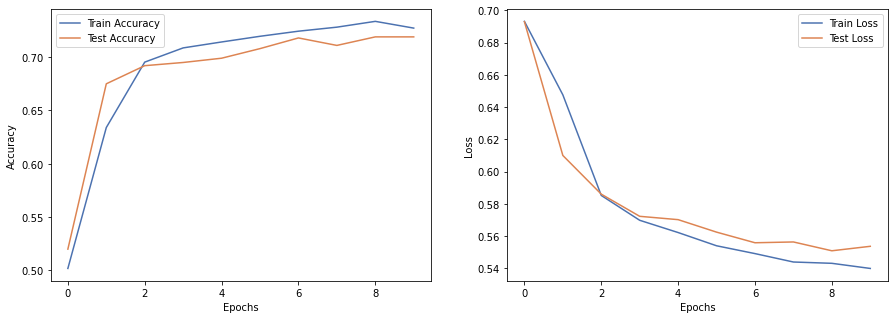

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

ax[0].plot(epochs, acc, label = 'Train Accuracy')
ax[0].plot(epochs, val_acc, label = 'Test Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, label = 'Train Loss')
ax[1].plot(epochs, val_loss, label = 'Test Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();